In [145]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [146]:
aml_df = pd.read_csv('../data_files/mbase_normed/aml.meta.mbase_norm.csv', index_col=0)

In [147]:
virus_df = pd.read_csv('../data_files/alldata.normalised.zeroes.csv', index_col=0)

In [148]:
virus_df.head()

,count,seq,file,type,acc,read_count,normalised_count
0,0,NM_001329964.1,aml_results/aml.SRR948635.sam.hitcount.txt,aml,SRR948635,17042498,0.0
1,0,NM_003722.4,aml_results/aml.SRR948635.sam.hitcount.txt,aml,SRR948635,17042498,0.0
2,0,NM_001329150.1,aml_results/aml.SRR948635.sam.hitcount.txt,aml,SRR948635,17042498,0.0
3,0,NM_001329149.1,aml_results/aml.SRR948635.sam.hitcount.txt,aml,SRR948635,17042498,0.0
4,0,NM_001329148.1,aml_results/aml.SRR948635.sam.hitcount.txt,aml,SRR948635,17042498,0.0


In [149]:
virus_df = virus_df[virus_df['type'] =='aml']

In [150]:
grouped_by_run = virus_df.groupby('acc').sum()[['normalised_count']]

In [151]:
grouped_by_run.head()

,normalised_count
acc,
SRR1036002,0.000000
SRR1036003,0.000000
SRR1036004,1564.737256
SRR1036005,0.000000
SRR1036006,0.000000


In [152]:
print ( grouped_by_run.shape)
print ( aml_df.shape)

(1500, 1)
(2725, 50)


In [153]:
master_df = aml_df.join(grouped_by_run)

In [154]:
master_df.head()

,Assay_Type,AssemblyName,AvgSpotLen,BioProject,BioSample,Center_Name,DATASTORE_filetype,Experiment,InsertSize,Instrument,...,alpha_dup_read_covers_snps_count_exact,beta_read_covers_snps_count_exact,norm_alignment_count,norm_alpha_wt_count,norm_alpha_dup_count,norm_beta_count,norm_alpha_read_covers_snps_count_exact,norm_alpha_dup_read_covers_snps_count_exact,norm_beta_read_covers_snps_count_exact,normalised_count
SRR330925,RNA-Seq,NaN,36,PRJNA145991,SAMN00709303,GEO,sra,SRX091763,0,Illumina Genome Analyzer II,...,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,86.033553
SRR330926,RNA-Seq,NaN,36,PRJNA145991,SAMN00709304,GEO,sra,SRX091764,0,Illumina Genome Analyzer II,...,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,804.348093
SRR330927,RNA-Seq,NaN,36,PRJNA145991,SAMN00709305,GEO,sra,SRX091765,0,Illumina Genome Analyzer II,...,0,0,0.034965,0.013986,0.013986,0.006993,0.0,0.0,0.0,320.668950
SRR330928,RNA-Seq,NaN,36,PRJNA145991,SAMN00709306,GEO,sra,SRX091766,0,Illumina Genome Analyzer II,...,0,0,0.005450,0.000000,0.000000,0.005450,0.0,0.0,0.0,633.918955
SRR330929,RNA-Seq,NaN,36,PRJNA145991,SAMN00709307,GEO,sra,SRX091767,0,Illumina Genome Analyzer II,...,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1168.619394


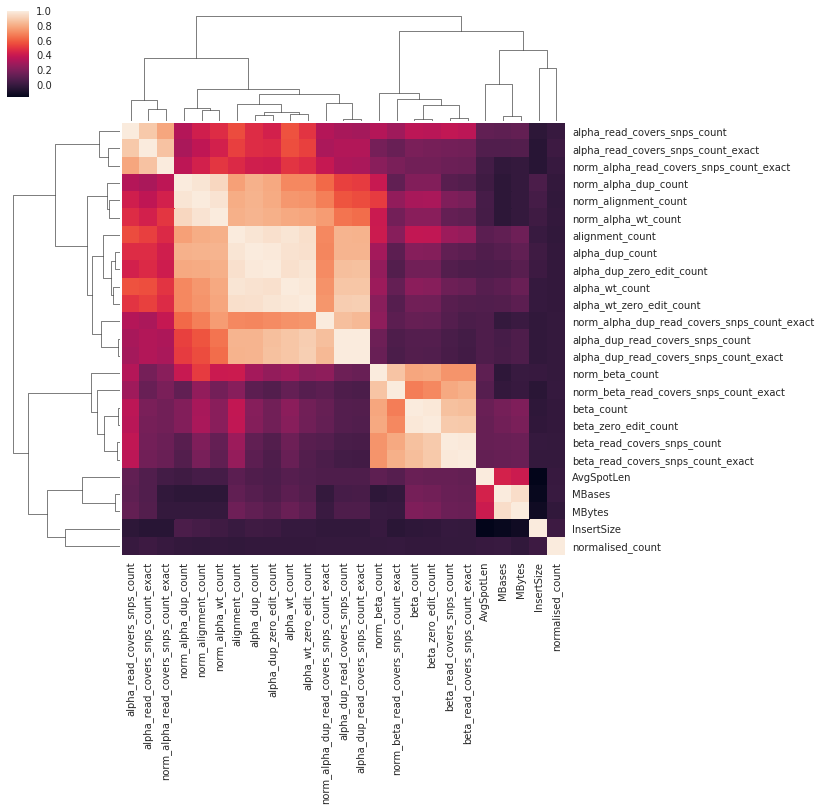

In [155]:
sns.clustermap(master_df.corr())

In [156]:
def has_dup(df):
    
    if df['norm_alpha_dup_read_covers_snps_count_exact'] == 0:
        
        return False
        
    else:
        
        return True

In [157]:
master_df['has_dup'] = master_df.apply(has_dup, axis=1)

In [158]:
master_df.groupby('has_dup').mean()[['MBases']]

,MBases
has_dup,
False,4902.176262
True,5622.433862


In [159]:
master_df.columns

Index(['Assay_Type', 'AssemblyName', 'AvgSpotLen', 'BioProject', 'BioSample',
       'Center_Name', 'DATASTORE_filetype', 'Experiment', 'InsertSize',
       'Instrument', 'LibraryLayout', 'LibrarySelection', 'Library_Name',
       'LoadDate', 'MBases', 'MBytes', 'Platform', 'ReleaseDate', 'SRA_Sample',
       'SRA_Study', 'Sample_Name', 'cell_type', 'source_name', 'tissue',
       'Consent', 'DATASTORE_provider', 'LibrarySource', 'Organism',
       'file_location', 'source', 'alignment_count', 'alpha_wt_count',
       'alpha_dup_count', 'beta_count', 'alpha_wt_zero_edit_count',
       'alpha_dup_zero_edit_count', 'beta_zero_edit_count',
       'alpha_read_covers_snps_count', 'alpha_dup_read_covers_snps_count',
       'beta_read_covers_snps_count', 'alpha_read_covers_snps_count_exact',
       'alpha_dup_read_covers_snps_count_exact',
       'beta_read_covers_snps_count_exact', 'norm_alignment_count',
       'norm_alpha_wt_count', 'norm_alpha_dup_count', 'norm_beta_count',
       'norm_a

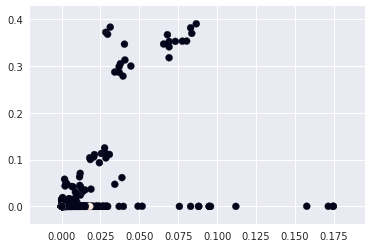

In [161]:
scaler = StandardScaler()

In [164]:
master_df = master_df[master_df['normalised_count'].isnull() == False]

In [173]:
x = master_df[['normalised_count']]

In [178]:
scaled = scaler.fit_transform(x)

In [179]:
master_df['scaled_her_count'] = scaled

In [180]:
master_df.head()

,Assay_Type,AssemblyName,AvgSpotLen,BioProject,BioSample,Center_Name,DATASTORE_filetype,Experiment,InsertSize,Instrument,...,norm_alignment_count,norm_alpha_wt_count,norm_alpha_dup_count,norm_beta_count,norm_alpha_read_covers_snps_count_exact,norm_alpha_dup_read_covers_snps_count_exact,norm_beta_read_covers_snps_count_exact,normalised_count,has_dup,scaled_her_count
SRR330925,RNA-Seq,NaN,36,PRJNA145991,SAMN00709303,GEO,sra,SRX091763,0,Illumina Genome Analyzer II,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,86.033553,False,-0.117841
SRR330926,RNA-Seq,NaN,36,PRJNA145991,SAMN00709304,GEO,sra,SRX091764,0,Illumina Genome Analyzer II,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,804.348093,False,0.093266
SRR330927,RNA-Seq,NaN,36,PRJNA145991,SAMN00709305,GEO,sra,SRX091765,0,Illumina Genome Analyzer II,...,0.034965,0.013986,0.013986,0.006993,0.0,0.0,0.0,320.668950,False,-0.048884
SRR330928,RNA-Seq,NaN,36,PRJNA145991,SAMN00709306,GEO,sra,SRX091766,0,Illumina Genome Analyzer II,...,0.005450,0.000000,0.000000,0.005450,0.0,0.0,0.0,633.918955,False,0.043178
SRR330929,RNA-Seq,NaN,36,PRJNA145991,SAMN00709307,GEO,sra,SRX091767,0,Illumina Genome Analyzer II,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1168.619394,False,0.200322


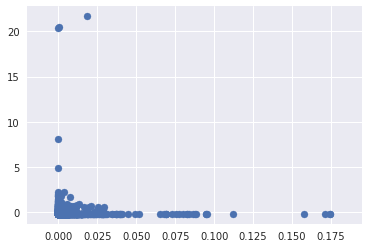

In [189]:
cm = plt.cm.get_cmap('RdYlBu')



x = master_df['norm_alpha_read_covers_snps_count_exact']
y = master_df['scaled_her_count']
#c = np.log(master_df['scaled_her_count'])
plt.scatter(x,y)


